In [1]:
# import packages
import pathlib
import pandas as pd
import Levenshtein 
import numpy as np

In [2]:
# read all sample_generated_tweets from csv
csvs = pathlib.Path("../sample_generated_tweets/").glob("**/*.csv")
# real original from txt
original_tweets = pd.read_fwf(r"../dataset/combined_Musk_tweets_cleaned.txt", header = None)
original_tweets.columns = ['text']


for csv in csvs:
    print(csv.name)

gpt2_fine_tuned.csv
gpt2_net_scratch.csv
gpt2_one_ep.csv
gpt2_tokenizer_scratch.csv
gru_char.csv
gru_gpt2-trained.csv
gru_gpt2.csv
gru_word.csv
lstm_char.csv
lstm_gpt2-trained.csv
lstm_gpt2.csv
lstm_word.csv
rnn_scratch_char.csv
rnn_scratch_gpt2-trained.csv
rnn_scratch_gpt2.csv
rnn_scratch_word.csv
stacked_lstm_char.csv
stacked_lstm_gpt2-trained.csv
stacked_lstm_gpt2.csv
stacked_lstm_word.csv


In [10]:
# Calculate the Levenstein distance and similarity, and find most similar tweets
results = []
for csv in csvs:
    dists = []
    sims = [] 
    result = {}
    generated_tweets = pd.read_csv(csv,index_col=0)

    for generated_tweet in generated_tweets["output"].head(300):
        min_dist = np.inf
        min_sim = 0
        most_similar_original = ""
        for original_tweet in original_tweets["text"]:
            s = Levenshtein.ratio(original_tweet, generated_tweet)
            d = Levenshtein.distance(original_tweet, generated_tweet)
            if d < min_dist:
                min_dist = d
                most_similar_original = original_tweet
            if s > min_sim:
                min_sim = s
                #most_similar_original = original_tweet
        dists.append(min_dist)
        sims.append(min_sim)
    result["name"] = csv.name
    result["avg_dist"] = np.mean(dists)
    result["avg_sim"] = np.mean(sims)
    results.append(result)
    #print(f"{csv.name}: {np.mean(dists)}")

checking $250/kWh is a super 
checking $300Mm it is a super
checking $35k some that was a
checking $5 like this weeks a
checking $US a probably a lot
checking & in the start start
checking &lt;ahem&gt; will be
checking (Ahem) are a sure in
checking (Credit is a simple 
checking (Formerly) a lot of 
checking (Lackn is probably a
checking (Sigh) is a signal i
checking (Zerothic is a super
checking (muffled the most li
checking *In the service for 
checking *cooling soon! Will 
checking -bit is a super star
checking /2 always a lot of t
checking /4 of the start the 
checking A123 will be a lot o
checking ABStainly in the sta
checking AC least a simulatio
checking AF lot of the start 
checking AI was a great to se
checking AMA was a start the 
checking AMD will be a lot of
checking APriting the most li
checking ATF is a super start
checking AWD on a little a lo
checking Aargh! Starship is a
checking Abandoned to be a lo
checking Ability is a super s
checking Abort to be a lot of
checking A

checking Blood the moon to se
checking Bloody is a support 
checking Bloombergs are a sig
checking Blow with a simple i
checking Blue of the start th
checking Body/tank of the sta
checking Bold say to be a lot
checking Bone it was a sure i
checking Booster than a simpl
checking BoredElonMusk in the
checking Boring to a lot of t
checking Boring, but its a gr
checking Bossart the producti
checking Both some sense to b
checking Both some sense to b
checking Both, so much and se
checking Bottome is a super s
checking Boughtting a lot of 
checking Bought, the support 
checking Boundeed to be a lot
checking Boy it on the start 
checking $250/kWh by the grea
checking $300Mk neural online
checking $35k (Tesla Powerwal
checking $5 orig!!! We have g
checking $US Oh Hitchotos Inc
checking & is great streesss 
checking &lt;ahem&gt; Elon-ch
checking (Ahem) rocks, a mont
checking (Creditact of NmODDK
checking (Formerly) Model Mon
checking (LackET* keeper! Ok 
checking (Sigh) you do a lot 
checking (

checking Beyond prem studioec
checking Bicurious?, we dont 
checking Bidenuta engine, its
checking Big'll prem prem rei
checking Bigger pets'lloubore
checking Biggest prem Port ex
checking Bikiniha, we were to
checking Billy separate corne
checking BioshockYes, I would
checking Bioweapon rein Hitch
checking BirdsYes. , this is 
checking Birth MicrosoftYes, 
checking BitYes, but not this
checking Bitcoin is right (no
checking Biting Building emph
checking Bitteo!, but our who
checking Bizarre prem optimiz
checking BlackYes, will be av
checking Black-Scholes claime
checking Blade emphasizeYes. 
checking Blame evolvinginking
checking Blazing order of the
checking Bless squeezeomes in
checking Blimps in the mies n
checking Block strainYes, and
checking Blog on Mars, as one
checking Blood on regulatory 
checking Bloody than it, espe
checking Bloomberg East illds
checking Blow necessaryYes, a
checking Blue optimizeorkank 
checking Body/tank will be fa
checking Bold enforceutat. No
checking B

checking Beautiful Mars, I wi
checking Because thats too! H
checking Becoming production 
checking BeenYes, coming soon
checking Beenz, I'm you you w
checking Before racing-Tesla 
checking Being:ald LZ is acro
checking Belfastinitely of Fa
checking Belief. Also, but ma
checking Believe in the futur
checking BenYes. I find if yo
checking Berlin is a few mont
checking Berliners like the u
checking BernieYes, maybe. Ou
checking Bernies-shirt is a T
checking BesidesYes, but are 
checking Besides, I am actual
checking Best toHaha actually
checking Best-selling Tesla v
checking Bet underway it does
checking BetaYes , but V-wall
checking Better. on the most 
checking Bettern are moderate
checking Between either week 
checking Beyond Don. I love t
checking Bicurious?Haha yes. 
checking Biden RollYes. It wa
checking Bigframe received te
checking BiggerchaYes, securi
checking Biggestaco rocket mo
checking Bikini bolted imagin
checking BillyYes. I love it.
checking Bioshock is amazing!
checking B

checking Babies rock ! ? I lo
checking Baby nearby barter b
checking Bach yes for next we
checking Back that the first 
checking Background on the la
checking Backlog of first sta
checking Backup Yes , probabl
checking Bad Yes , but only s
checking Bajirao Exactly . Th
checking Barely customized bi
checking Barrel on roof , thr
checking Base Yes I do . Will
checking Based on the memery 
checking Basic Battlestar Xs 
checking Basically Not a dysl
checking Basically , only a b
checking Batteries Yes , the 
checking Battery throughput s
checking Battle rocky . . app
checking Be gunpoint transpor
checking Bear of real years &
checking Beat me of this thre
checking Beatrix Yes , the dr
checking Beautiful Tesla sola
checking Because helicopter i
checking Becoming should do t
checking Been hydrophobic unn
checking Beenz , Tesla Autopi
checking Before impact & rule
checking Being accelerate Yes
checking Belfast is beautiful
checking Belief and SpaceX pr
checking Believe of the futur
checking B

checking Autonomy in a few mo
checking Autopilot of the sup
checking Availability is a li
checking Avengest the world i
checking Average to be a lot 
checking Avgied to a few days
checking Avionics a lot of th
checking Avocado to the super
checking Awaiting on the real
checking Award a lot of the s
checking Aweday is a strange 
checking Awesome is a strange
checking Awesome, the are the
checking Axelacity is a stran
checking B-nute to a few days
checking BDE will be a lot of
checking BFR have a strange d
checking BG2 Am a lot of the 
checking BGII wide the super 
checking BN1 drive to the sup
checking BTC when the part a 
checking Babies are some to t
checking Baby a long and the 
checking Bach and the super c
checking Back a little some f
checking Background the super
checking Backloge of the supe
checking Backup to the super 
checking Badd the working on 
checking Bajiraone a lot of t
checking Barely problem that 
checking Barrely soon of the 
checking Base company of the 
checking B

checking Aspirationally for e
checking Aspirationally, deca
checking Aspiring to have no 
checking AssertiE. I love you
checking Assume principle tim
checking Assuming max acceler
checking Asteroid impact risk
checking Astronaughty planet 
checking Astronaut spacesuit 
checking Astronauts Play With
checking Astronomer Royal Mar
checking At this pointless, i
checking Atatrk Antkabir, etc
checking Atmospheric entry at
checking Attach wheels to the
checking Attempting bring up 
checking August th, either at
checking Austin now, but it's
checking Austin++ increase fo
checking Auto dealers trying 
checking Auto-semiotic asphyx
checking Autolist survey find
checking Automatically drive 
checking Autonomous SpaceX dr
checking Autonomy must & do, 
checking Autopilot team is ma
checking Availability satelli
checking Avenge the dinosaurs
checking Average, some events
checking Avgue. Muster Pok! i
checking Avionics cables movi
checking Avocado Toast, even 
checking Awaiting approval fr
checking A

checking Appreciated on behal
checking Approach is deg flus
checking Approx min throttle 
checking Approximately km/s, 
checking Approximately, log(r
checking April st, booster en
checking Archangel-12 Musk m 
checking Are you sure Signal 
checking Area of Area Tesla, 
checking Arent there good one
checking Arguments, followed,
checking Armored Personnel Ca
checking Around mid. Then wat
checking Arrived Austin. Talk
checking Ars Technica, Cybert
checking Article on and colon
checking Aspirationally, deca
checking Ascent to the Heaven
checking Ashlee Vance's biogr
checking Ashok was the first 
checking Asimovs Foundation b
checking Asimov's Foundation 
checking Asimovs Foundation b
checking Ask me anything. Its
checking Aspirationally, deca
checking Aspirationally, deca
checking Aspiring to have no 
checking AssertiMoney. Just a
checking Assume the worst. No
checking Assuming user approv
checking Asteroid impact risk
checking Astronaughty by Natu
checking Astronaut spacesuit 
checking A

checking Another milestone fl
checking Answer the question 
checking Answers: Yes . No . 
checking Anti-matter def wins
checking Antibody half-life f
checking Anxiety is a scalar 
checking Any feature requests
checking Anyone who bought FS
checking Anything surprising 
checking Anyway , were just w
checking Anywhere insurance p
checking Apart from failing t
checking Apollo ( first % lay
checking Apologies for those 
checking Apologies , release 
checking App update is about 
checking Apparently , there i
checking Appears to be a wiri
checking Apple app store fees
checking Applies worldwide . 
checking Apply light force to
checking Applying information
checking Appreciate thoughtfu
checking Appreciated on behal
checking Approach is deg flus
checking Approx min throttle 
checking Approximately km/s r
checking Approximately , log 
checking April st , will do o
checking Archangel- part and 
checking Are you sure Signal 
checking Area of Area pics Bo
checking Arent there good one
checking A

checking Also, we will be a f
checking Alterate to a sec of
checking Although is a few da
checking Although is a few da
checking Aluminumation is a l
checking Always for the super
checking Am and so an old to 
checking Amazing to do the st
checking Amazingly, but it wi
checking American is a great 
checking American, but its a 
checking Amos's are a time to
checking Amount of the future
checking And the should be a 
checking Anarcho-syndicalism 
checking Ancient to a sec of 
checking And the should be a 
checking And, I will be a few
checking Andrejor to a sec of
checking Anne's by a big diff
checking Announcement to a se
checking Announcements are a 
checking Announcing the futur
checking Annoying to do the s
checking Annually the future 
checking Anonymous are a time
checking Another the future o
checking Answered by a big di
checking Answers: I was a sec
checking Anti-matter to a sec
checking Antibody to a sec of
checking Anxiety in the futur
checking Any meant to be a fe
checking A

checking Additive tunnel; IMB
checking Addressingairments, 
checking Adjusting haha. A li
checking Advanced, production
checking Advancing the bro AI
checking Advertising lowerize
checking AfricaYes, I don't d
checking AfterYes, we are the
checking Ageela-driving know 
checking AgreedYes, exciting 
checking Agreed, to add the s
checking AhYes. Will post.. A
checking AhemYes. I love you?
checking Ahem, yes I just can
checking Aimela, which will b
checking AimingYes, this is e
checking Airlines Shuttlecell
checking AlexanderI was not t
checking Aliens subsonic head
checking All smoothly. Will d
checking Allows thought the g
checking Almost %, absdeg Hrr
checking Aloha,nt not most fu
checking Along AmbienYes. So!
checking Already PorscheYes, 
checking AlsoYes, even not al
checking Also, we are minimiz
checking Alter Mriteracy Alto
checking Altho instrumentERGh
checking Although subsonic bu
checking AluminumgroundYes, w
checking AlwaysYes, even fine
checking Am Puerto trippy tri
checking A

checking AcceleratingYes, but
checking AcceptHGats actually
checking Acceptable, but Tesl
checking According to have ve
checking Accounts a voice vir
checking Accurate video team 
checking Achieving the same r
checking Acid Created'tYes. I
checking Acquisition Seriousl
checking Across theloop and m
checking ActionI am a great o
checking Activate as more som
checking Activating rocket en
checking ActiveYes, but will 
checking Activists should be 
checking ActualYes, and not g
checking ActuallyYes, but its
checking Actually, am that do
checking Ad dopamineactory up
checking Adagio for Munro is 
checking Add-Yes, but Tesla i
checking AddLabel -&gt; Perso
checking Adding detailing to 
checking AdditiveH-driving is
checking AddressingHrering pl
checking Adjusting soon now h
checking Advanced, but probab
checking Advancing a book to 
checking AdvertisingYes, but 
checking Africa is big, but o
checking AfterYes, but liquid
checking Age/Autopilot engine
checking Agreed, but a Tesla 
checking A

checking ( muffled titter ) n
checking * In mind months civ
checking * cooling haha , tha
checking -bit Yes , but its n
checking / Yes , Cybertruck w
checking / Yes , Cybertruck w
checking A Remdesivir sting m
checking ABS the Earth is bes
checking AC seals . . is a lo
checking AF Yes , nd version 
checking AI Yes . This is not
checking AMA I hope that . It
checking AMD Yes , most to wo
checking AP flight Yes . It i
checking ATF in sure hard we 
checking AWD Yes . Thats a fe
checking Aargh Yes ! it team 
checking Abandoned continuanc
checking Ability I was good t
checking Abort Yes . . . port
checking Aborted Yes , will p
checking About mins to launch
checking Above % likely to be
checking Absolutely Yes . No 
checking Absolutely , I will 
checking Abysmal Snoop freesp
checking Accelerating Starshi
checking Accept Incent Shrek 
checking Acceptable , and you
checking According to thank y
checking Accounts the Interne
checking Accurate Yes , but t
checking Achieving RT deleted
checking A

checking Boring Yes , but it 
checking Boring , Tesla vehic
checking Bossart I was just t
checking Bot Its just just ju
checking Both I do do there s
checking Both , do not yet do
checking Bottom ~ . m . . . i
checking Bought high-speed de
checking Bought , the Tesla s
checking Bound to happen ! Te
checking Boy I do love Tintin


In [11]:
results

[{'name': 'lstm_char.csv', 'avg_dist': 33.86, 'avg_sim': 0.5330963011614042},
 {'name': 'lstm_gpt2-trained.csv',
  'avg_dist': 145.12666666666667,
  'avg_sim': 0.4547169123133017},
 {'name': 'lstm_gpt2.csv',
  'avg_dist': 145.41333333333333,
  'avg_sim': 0.4578072784109969},
 {'name': 'lstm_word.csv', 'avg_dist': 159.33, 'avg_sim': 0.45038329452722203},
 {'name': 'rnn_scratch_char.csv',
  'avg_dist': 32.53,
  'avg_sim': 0.5503384633417929},
 {'name': 'rnn_scratch_gpt2-trained.csv',
  'avg_dist': 141.56,
  'avg_sim': 0.4669749132316362},
 {'name': 'rnn_scratch_gpt2.csv',
  'avg_dist': 147.98333333333332,
  'avg_sim': 0.47163756920040273},
 {'name': 'rnn_scratch_word.csv',
  'avg_dist': 153.31666666666666,
  'avg_sim': 0.465722874345403},
 {'name': 'stacked_lstm_char.csv',
  'avg_dist': 34.026666666666664,
  'avg_sim': 0.5391712128037107},
 {'name': 'stacked_lstm_gpt2-trained.csv',
  'avg_dist': 143.87,
  'avg_sim': 0.4577645149312721},
 {'name': 'stacked_lstm_gpt2.csv',
  'avg_dist': 14

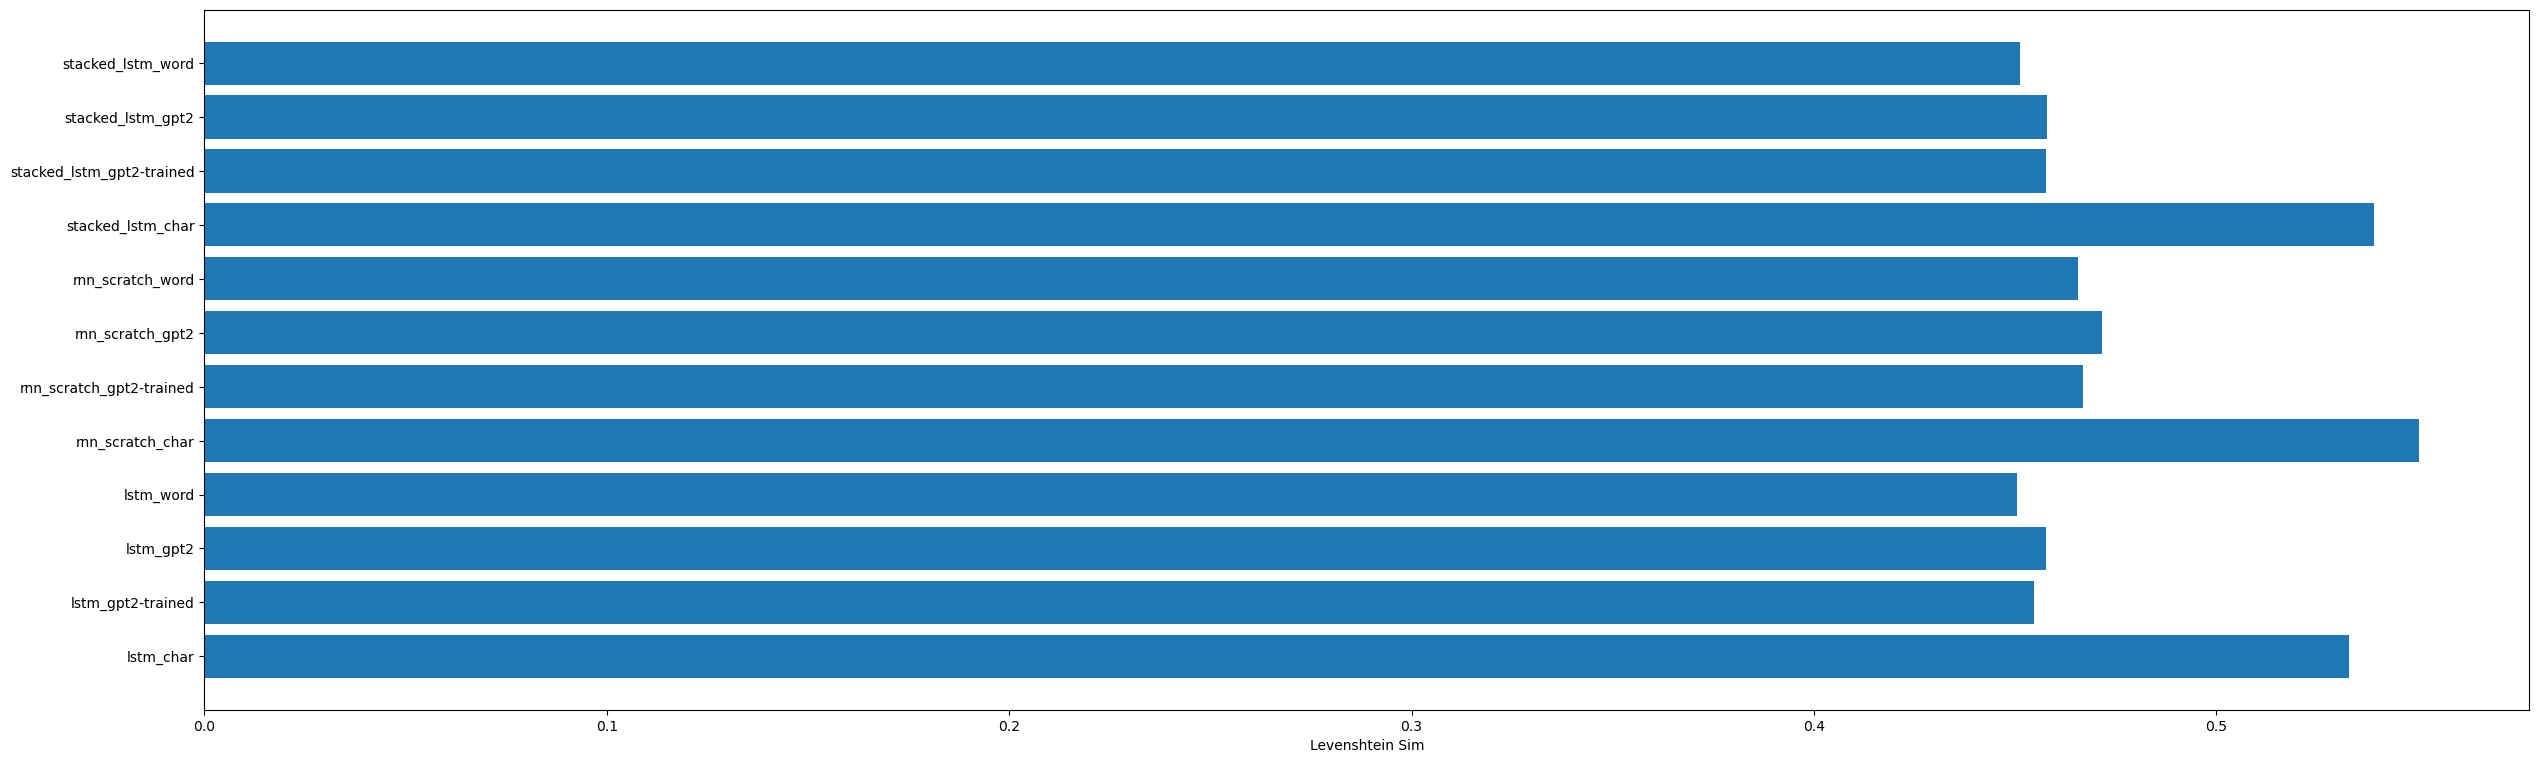

In [12]:
# Plot Levenshtein
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

name = []
avg_dist = []
avg_sim = []
for result in results:
    name.append(result["name"].replace(".csv",""))
    avg_dist.append(result["avg_dist"])
    avg_sim.append(result["avg_sim"])
y_pos = np.arange(len(name))

fig = plt.figure(figsize=(30,20)) 
#plt.tick_params(axis='x', labelsize=8)
#plt.subplot(2,1,1)
#plt.barh(y_pos, avg_dist, align='center')
#plt.yticks(y_pos, name)
#plt.xlabel('Levenshtein Distence')


plt.subplot(2,1,2)
plt.barh(y_pos, avg_sim, align='center')
plt.yticks(y_pos, name)
plt.xlabel('Levenshtein Sim')
#plt.title('Levenshtein')

plt.show()

In [14]:
name = []
avg_dist = []
avg_sim = []
for result in results:
    name.append(result["name"].replace)
    avg_dist.append(result["avg_dist"])
    avg_sim.append(result["avg_sim"])

In [ ]:
# Sentiment Analysis
from transformers import pipeline
from transformers import AutoModel, AutoTokenizer 

model_name = "cardiffnlp/twitter-roberta-base-sentiment" 
model = AutoModel.from_pretrained(model_name)
sentiment_task = pipeline("sentiment-analysis", model=model_name, tokenizer=model_name, device=0)

csvs = pathlib.Path("../sample_generated_tweets/").glob("*.csv")

original_tweets = pd.read_fwf(r"../dataset/combined_Musk_tweets_cleaned.txt", header = None)
original_tweets.columns = ['text']
sentiment_results = []
for csv in csvs:
    generated_tweets = pd.read_csv(csv,index_col=0) 
    data = generated_tweets["output"].tolist()
    result = sentiment_task(data)
    result.append(csv.name)
    sentiment_results.append(result)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment were not used when initializing RobertaModel: ['classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictio

In [ ]:
data = original_tweets["text"].tolist()
original_tweets_sentiment_results = sentiment_task(data)

In [ ]:
def sentiment(sentiment_result):
    Negative, Neutral, Positive = 0, 0, 0
    result={}
    for i in sentiment_result:
        if isinstance(i, dict):
            if i["label"]== "LABEL_0":
                Negative += 1
            if i["label"]== "LABEL_1":
                Neutral += 1
            if i["label"]== "LABEL_2":
                Positive += 1
        if isinstance(i, str):
            result["name"] = i
    result["Negative"]=Negative/(len(sentiment_result)-1)
    result["Neutral"]=Neutral/(len(sentiment_result)-1)
    result["Positive"]=Positive/(len(sentiment_result)-1)
    return result

In [ ]:

original_tweets_result = sentiment(original_tweets_sentiment_results)
    

In [ ]:
sentiment_gen_result_count = []
for sentiment_result in sentiment_results:
    result = sentiment(sentiment_result)
    sentiment_gen_result_count.append(result)

In [ ]:
sentiment_gen_result_count.append(original_tweets_result)

In [ ]:
# Plot Sentiment Analysis
plt.figure(figsize=(25,20))
init = 1
for element in sentiment_gen_result_count:
    plt.subplot(4,5,init)
    plt.subplots_adjust(wspace =0.4, hspace =0.2)
    init += 1
    labels = []
    Y1= []
    Y2= []
    Y3= []
    
    labels.append(element['name'].replace(".csv",""))
    x = np.arange(len(labels))
    Y1.append(element['Negative'])
    Y2.append(element['Neutral'])
    Y3.append(element['Positive'])
    width = 0.01  # 柱子的宽度

    plt.bar(x - width, Y1, width=width, label='Negative')
    plt.bar(x, Y2, width=width, label='Neutral')
    plt.bar(x + width, Y3, width=width, label='Positive')
    plt.ylabel('Scores')
    #plt.title('3 datasets')
    # x轴刻度标签位置不进行计算
    plt.xticks(x, labels=labels)
    plt.rc('xtick', labelsize=20) 
    plt.legend(loc='upper left')


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
#titles_table = pd.read_csv("../input/ForumTopics.csv")

def wordCloudFunction(df,column,numWords):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    word_string=str(popular_words_nonstop)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=numWords,
                          width=1000,height=1000,
                         ).generate(word_string)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english") and w not in [";",".","%","&","<pad>"] ]
    plt.barh(range(5), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:5])])
    plt.xticks([])
    plt.yticks([x  for x in range(5)], reversed(popular_words_nonstop[0:5]))
    #plt.title(title)
    print(title)
    plt.show()

In [ ]:
import wordcloud
csvs = pathlib.Path("../sample_generated_tweets/").glob("*.csv")
for csv in csvs:
    generated_tweets = pd.read_csv(csv,index_col=0)
    wc = wordcloud.WordCloud(
            width=1200,
            height=900,
            background_color='white')
    wc.generate(generated_tweets["output"].to_string(index=False))
    #wc.to_file(f'wordcloud/Musk_gen.png')
    print(csv.name)
    plt.clf()
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [ ]:
# plot Wordcloud
import wordcloud

wc = wordcloud.WordCloud(
            width=1200,
            height=900,
            background_color='white')
wc.generate(original_tweets["text"].to_string(index=False))
#wc.to_file(f'wordcloud/Musk_gen.png')
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
# plot most common word in original_tweets
plt.figure(figsize=(5,1))
wordBarGraphFunction(original_tweets,'text',"Popular Words in original tweets")

# plot wordcloud
#plt.figure(figsize=(15,15))
#wordCloudFunction(original_tweets,'text',10000000)

In [ ]:
# plot most common word in generated_tweets
csvs = pathlib.Path("../sample_generated_tweets/").glob("*.csv")
for csv in csvs:
    if "gpt2" in csv.name:
        generated_tweets = pd.read_csv(csv,index_col=0)

        plt.figure(figsize=(5,1))
        name = csv.name.replace(".csv", "")
        print(name)
        #if name == "lstm_char" or name == "stacked_lstm_char" or name == "rnn_scratch_char" or name == "gru_char":
        #    continue
        wordBarGraphFunction(generated_tweets,'output',f"Popular Words in {name} generated tweets")
        #plt.show()
        #plt.figure(figsize=(5,1))
        #wordCloudFunction(original_tweets,'text',10000000)